# Finals Plots for the Paper

In [1]:
# some magic so that the notebook will reload external python modules;
# see https://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [13]:
import os
import subprocess
import sys
import numpy as np
import matplotlib.pyplot as plt
import string
from copy import copy
import gc
import glob
import json
import string
import math
import pandas as pd
# import scienceplots
%matplotlib inline

import cv2
import torch

In [3]:
sys.path.append(os.path.abspath('..'))

In [14]:
# from data_processing.video_utils import seconds_to_hhmmss
# !pip install wordcloud
from analyse_utils import get_speaker_df, get_word_frequencies, draw_word_cloud, aggregate_errors, print_most_frequent_errors

In [15]:
def process_text(text):
    punctuation = string.punctuation.replace("'", "")
    text = text.translate(str.maketrans('', '', punctuation))
    text = text.upper()
    return text

## For Deaf Speakers

In [16]:
data_dir = "/ssd_scratch/cvit/vanshg/datasets/deaf-youtube"
deaf_speakers = ['realdeafdreamer', 'cochlear_kaz', 'benny', 'mia_sandra']
deaf_df_list = []

for speaker in deaf_speakers:
    # speaker = "benny"
    speaker_dir = os.path.join(data_dir, f"{speaker}")
    clips_dir = os.path.join(speaker_dir, f"website_sentence_clips")

    clip_files = glob.glob(os.path.join(clips_dir, "*/clips.json"))
    clip_files = sorted(clip_files)
    print(f"{len(clip_files) = }")
    print(f"{clip_files = }")

    speaker_df = get_speaker_df(clip_files)
    speaker_reduced_labelfile = os.path.join(speaker_dir, "all_reduced_labels.txt")
    selected_video_names = []

    with open(speaker_reduced_labelfile) as file:
        for line in file.readlines():
            video_path = line.split()[0]
            video_name = os.path.basename(video_path).split('.')[0]
            selected_video_names.append(video_name)

    speaker_df = speaker_df[speaker_df['video_name'].isin(selected_video_names)]
    deaf_df_list.append(speaker_df)

deafs_df = pd.concat(deaf_df_list, ignore_index=True)
deafs_df

len(clip_files) = 0
clip_files = []


FileNotFoundError: [Errno 2] No such file or directory: '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/realdeafdreamer/all_reduced_labels.txt'

In [7]:
speaker_reduced_labelfile = os.path.join(speaker_dir, "all_reduced_labels.txt")
selected_video_names = []

with open(speaker_reduced_labelfile) as file:
    for line in file.readlines():
        video_path = line.split()[0]
        video_name = os.path.basename(video_path).split('.')[0]
        selected_video_names.append(video_name)

print(f"Number of Selected Video Names: {len(selected_video_names)}")

Number of Selected Video Names: 1419


In [13]:
print(selected_video_names)

['dyb71EMatR0_0_9_9', 'dyb71EMatR0_0_6_6', 'vcqcMYsL3P8_1_62_62', 'VMoimi4ci00_10_39_37', 'JaB9BT09nSE_52_88_71', 'XlEO7pWAc84_3_13_12', 'W1hE8AL2Jx8_12_71_68', 'dyb71EMatR0_12_79_77', 'VMoimi4ci00_3_19_18', 'dyb71EMatR0_16_107_104', 'RcFck_p-jOw_3_15_15', 'gYMy4Aioa5s_22_47_36', 'RcFck_p-jOw_3_24_24', 'gYMy4Aioa5s_62_116_87', 'dyb71EMatR0_16_105_102', 'vativsC3YgU_5_24_21', 'XlEO7pWAc84_8_52_48', '5R1wKqS3sA8_0_3_3', 'hPbPzlv1ojM_13_37_36', 'gYMy4Aioa5s_123_203_140', 'gYMy4Aioa5s_0_1_1', 'gYMy4Aioa5s_72_146_111', 'RcFck_p-jOw_39_80_61', 'gYMy4Aioa5s_77_153_115', 'vativsC3YgU_28_89_75', 'RcFck_p-jOw_25_57_47', 'XlEO7pWAc84_9_105_100', 'vativsC3YgU_2_10_8', 'VMoimi4ci00_40_108_101', 'RcFck_p-jOw_79_116_82', 'dyb71EMatR0_15_98_95', 'vcqcMYsL3P8_1_36_36', 'VMoimi4ci00_27_80_73', 'XlEO7pWAc84_6_32_29', 'W1hE8AL2Jx8_0_3_3', '5R1wKqS3sA8_9_63_57', 'dyb71EMatR0_4_33_33', 'gYMy4Aioa5s_32_67_51', 'dyb71EMatR0_3_22_22', 'gYMy4Aioa5s_69_137_104', 'vcqcMYsL3P8_1_51_51', 'W1hE8AL2Jx8_12_79_76', 'gY

In [17]:
speaker_df = speaker_df[speaker_df['video_name'].isin(selected_video_names)]
speaker_df

KeyError: 'video_name'

Total Duration: 04:54:19.009
Durations, Min: 0.3999999999999772 | Max: 19.100000000000023 | Mean: 3.555982480869915
Length, Min: 1 | Max: 55 | Mean: 7.849778493757551


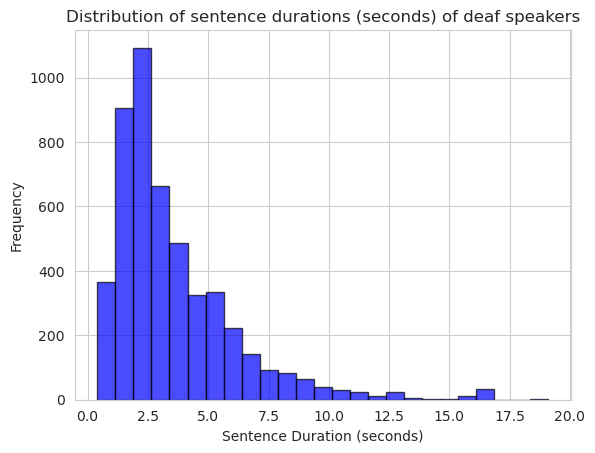

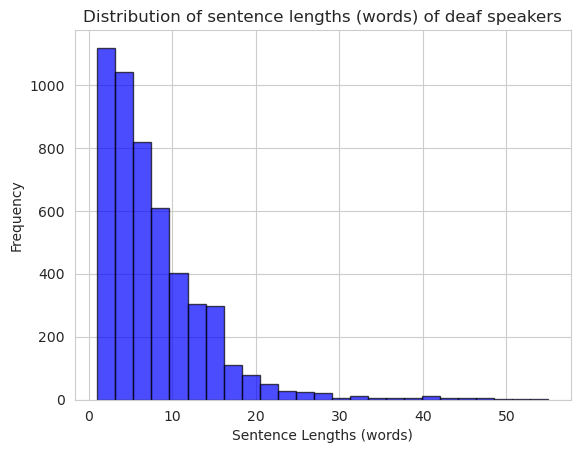

In [31]:
sentence_durations = deafs_df['num_seconds'].to_numpy()
sentence_lengths = deafs_df['num_words'].to_numpy()
print(f"Total Duration: {seconds_to_hhmmss(sentence_durations.sum())}")
print(f"Durations, Min: {sentence_durations.min()} | Max: {sentence_durations.max()} | Mean: {sentence_durations.mean()}")
print(f"Length, Min: {sentence_lengths.min()} | Max: {sentence_lengths.max()} | Mean: {sentence_lengths.mean()}")


# plt.style.use(['science', 'iee'])
plt.hist(sentence_durations, bins=25, color='b', edgecolor='black', alpha=0.7)
plt.title(f"Distribution of sentence durations (seconds) of deaf speakers")
plt.xlabel('Sentence Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

plt.hist(sentence_lengths, bins=25, color='b', edgecolor='black', alpha=0.7)
plt.title(f"Distribution of sentence lengths (words) of deaf speakers")
plt.xlabel(f"Sentence Lengths (words)")
plt.ylabel(f"Frequency")
plt.show()

## Accented Speaker Distributions

In [10]:
data_dir = "/ssd_scratch/cvit/vanshg/datasets/accented_speakers"
accented_speakers = ['jack', 'emily_canham', 'riyadh', 'diane_jennings', 'daniel_howell']
accented_df_list = []

for speaker in accented_speakers:
    # speaker = "benny"
    speaker_dir = os.path.join(data_dir, f"{speaker}")
    clips_dir = os.path.join(speaker_dir, f"sentence_clips")

    clip_files = glob.glob(os.path.join(clips_dir, "*/clips.json"))
    clip_files = sorted(clip_files)
    print(f"{len(clip_files) = }")
    print(f"{clip_files = }")

    speaker_df = get_speaker_df(clip_files)
    speaker_reduced_labelfile = os.path.join(speaker_dir, "all_reduced_labels.txt")
    selected_video_names = []

    with open(speaker_reduced_labelfile) as file:
        for line in file.readlines():
            video_path = line.split()[0]
            video_name = os.path.basename(video_path).split('.')[0]
            selected_video_names.append(video_name)

    speaker_df = speaker_df[speaker_df['video_name'].isin(selected_video_names)]
    accented_df_list.append(speaker_df)

accented_df = pd.concat(accented_df_list, ignore_index=True)
accented_df

len(clip_files) = 7
clip_files = ['/ssd_scratch/cvit/vanshg/datasets/accented_speakers/jack/sentence_clips/23su4pTJ_XY/clips.json', '/ssd_scratch/cvit/vanshg/datasets/accented_speakers/jack/sentence_clips/426D8qmAW9U/clips.json', '/ssd_scratch/cvit/vanshg/datasets/accented_speakers/jack/sentence_clips/4cv3lIvnpiI/clips.json', '/ssd_scratch/cvit/vanshg/datasets/accented_speakers/jack/sentence_clips/58l9hcyGsGI/clips.json', '/ssd_scratch/cvit/vanshg/datasets/accented_speakers/jack/sentence_clips/7XlHCoEJenE/clips.json', '/ssd_scratch/cvit/vanshg/datasets/accented_speakers/jack/sentence_clips/ETWbMaxGmbA/clips.json', '/ssd_scratch/cvit/vanshg/datasets/accented_speakers/jack/sentence_clips/JbkdvIauRYM/clips.json']
len(clip_files) = 3
clip_files = ['/ssd_scratch/cvit/vanshg/datasets/accented_speakers/emily_canham/sentence_clips/Yc1Ykz8QL5g/clips.json', '/ssd_scratch/cvit/vanshg/datasets/accented_speakers/emily_canham/sentence_clips/h8itGJ0GvG0/clips.json', '/ssd_scratch/cvit/vanshg/datasets

video_path  \
0     /ssd_scratch/cvit/vanshg/datasets/accented_spe...   
1     /ssd_scratch/cvit/vanshg/datasets/accented_spe...   
2     /ssd_scratch/cvit/vanshg/datasets/accented_spe...   
3     /ssd_scratch/cvit/vanshg/datasets/accented_spe...   
4     /ssd_scratch/cvit/vanshg/datasets/accented_spe...   
...                                                 ...   
5156  /ssd_scratch/cvit/vanshg/datasets/accented_spe...   
5157  /ssd_scratch/cvit/vanshg/datasets/accented_spe...   
5158  /ssd_scratch/cvit/vanshg/datasets/accented_spe...   
5159  /ssd_scratch/cvit/vanshg/datasets/accented_spe...   
5160  /ssd_scratch/cvit/vanshg/datasets/accented_spe...   

                    video_name         video_id status  start    end  \
0            23su4pTJ_XY_0_4_4      23su4pTJ_XY   None   21.5   35.9   
1            23su4pTJ_XY_2_5_6      23su4pTJ_XY   None   44.5   45.3   
2            23su4pTJ_XY_2_6_7      23su4pTJ_XY   None   45.7   49.8   
3            23su4pTJ_XY_2_7_8      23su4pTJ_XY   None   49.8   65.2   
4            23su4pTJ_XY_2_8_9      23su4pTJ_XY   None   65.4   69.0   
...                        ...              ...    ...    ...    ...   
5156  oUPRwfb37sM_004_19_68_69  oUPRwfb37sM_004   None  268.1  277.1   
5157  oUPRwfb37sM_004_21_69_70  oUPRwfb37sM_004   None  283.0  283.8   
5158  oUPRwfb37sM_004_22_71_72  oUPRwfb37sM_004   None  285.6  293.5   
5159  oUPRwfb37sM_004_23_72_73  oUPRwfb37sM_004   None  293.6  296.7   
5160  oUPRwfb37sM_004_23_73_74  oUPRwfb37sM_004   None  297.9  298.7   

                                             transcript  \
0      In regards to what it is, I've kind of been a...   
1                                      on this channel?   
2           I started them six years ago at this point.   
3     2016 was the first time I ever did anything wi...   
4      Remember that short film I did with Chase Bro...   
...                                                 ...   
5156  So if you want to see some stand-up self-depre...   
5157                                I'll be seeing you.   
5158  I promised nothing other than I'm trying to ma...   
5159               So yeah, that is why I quit YouTube.   
5160                                         Subscribe.   

                                         processed_text  num_words  \
0      IN REGARDS TO WHAT IT IS I'VE KIND OF BEEN AT...         63   
1                                       ON THIS CHANNEL          3   
2            I STARTED THEM SIX YEARS AGO AT THIS POINT          9   
3     2016 WAS THE FIRST TIME I EVER DID ANYTHING WI...         56   
4      REMEMBER THAT SHORT FILM I DID WITH CHASE BRO...         11   
...                                                 ...        ...   
5156  SO IF YOU WANT TO SEE SOME STANDUP SELFDEPRECA...         34   
5157                                 I'LL BE SEEING YOU          4   
5158  I PROMISED NOTHING OTHER THAN I'M TRYING TO MA...         30   
5159                 SO YEAH THAT IS WHY I QUIT YOUTUBE          8   
5160                                          SUBSCRIBE          1   

      num_seconds  
0            14.4  
1             0.8  
2             4.1  
3            15.4  
4             3.6  
...           ...  
5156          9.0  
5157          0.8  
5158          7.9  
5159          3.1  
5160          0.8  

[5161 rows x 10 columns]

Total Duration: 05:04:33.191
Durations, Min: 0.3999999999999772 | Max: 16.700000000000017 | Mean: 3.5406299166828132
Length, Min: 1 | Max: 75 | Mean: 12.729897306723503


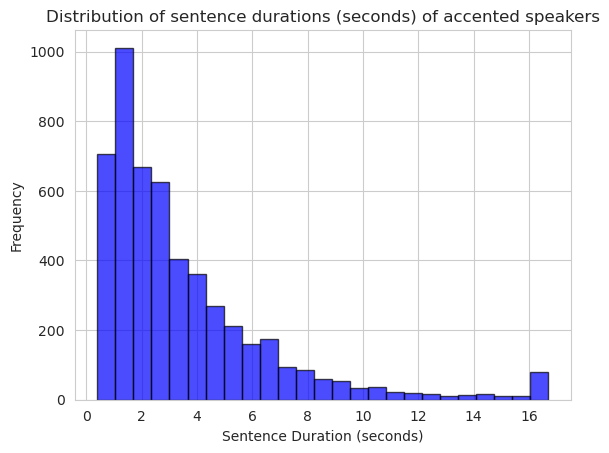

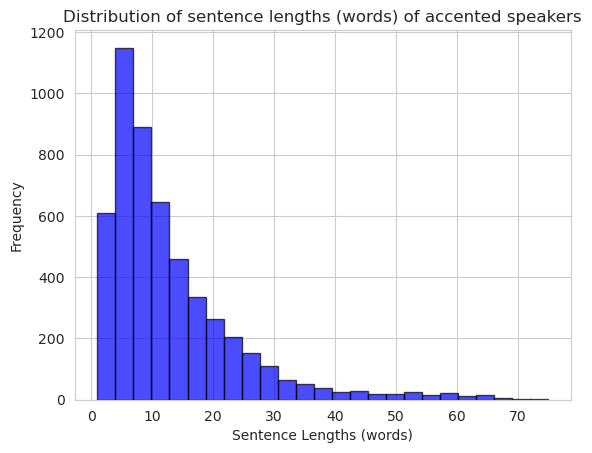

In [30]:
sentence_durations = accented_df['num_seconds'].to_numpy()
sentence_lengths = accented_df['num_words'].to_numpy()
print(f"Total Duration: {seconds_to_hhmmss(sentence_durations.sum())}")
print(f"Durations, Min: {sentence_durations.min()} | Max: {sentence_durations.max()} | Mean: {sentence_durations.mean()}")
print(f"Length, Min: {sentence_lengths.min()} | Max: {sentence_lengths.max()} | Mean: {sentence_lengths.mean()}")


# plt.style.use(['science', 'iee'])
plt.hist(sentence_durations, bins=25, color='b', edgecolor='black', alpha=0.7)
plt.title(f"Distribution of sentence durations (seconds) of accented speakers")
plt.xlabel('Sentence Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

plt.hist(sentence_lengths, bins=25, color='b', edgecolor='black', alpha=0.7)
plt.title(f"Distribution of sentence lengths (words) of accented speakers")
plt.xlabel(f"Sentence Lengths (words)")
plt.ylabel(f"Frequency")
plt.show()

In [91]:
accented_df
unique_video_ids = accented_df['video_id'].unique()
print(unique_video_ids)
print(len(unique_video_ids))

['23su4pTJ_XY' '426D8qmAW9U' '4cv3lIvnpiI' '58l9hcyGsGI' '7XlHCoEJenE'
 'ETWbMaxGmbA' 'JbkdvIauRYM' 'Yc1Ykz8QL5g' 'h8itGJ0GvG0' 'lxlYzMAw-qE'
 '2NEOy0ekT8k' '3G2vHMo9B5I' '5s4y0LcTIUw' '7xd_NmYURmE' 'XMHrO56108w'
 'arvNiJFXzqo' 'AUN8GdpHb7M_000' 'HJg9K8Mkm1U_004' 'Ilk2Ov7lsD0_002'
 'VKm6tTrKxVo_003' 'V_X16pV1V0_000' 'YDg9LtfGYhY_001' 'oUPRwfb37sM_000'
 'oUPRwfb37sM_001' 'oUPRwfb37sM_002' 'oUPRwfb37sM_003' 'oUPRwfb37sM_004']
27


In [86]:
unique_video_ids = deafs_df['video_id'].unique()
print(f"Number of unique video ids: {len(unique_video_ids)}")
deafs_df

Number of unique video ids: 117


video_path            video_name  \
0     /ssd_scratch/cvit/vanshg/datasets/deaf-youtube...     15b1sEDtVCs_1_2_2   
1     /ssd_scratch/cvit/vanshg/datasets/deaf-youtube...     15b1sEDtVCs_1_3_3   
2     /ssd_scratch/cvit/vanshg/datasets/deaf-youtube...     15b1sEDtVCs_1_5_5   
3     /ssd_scratch/cvit/vanshg/datasets/deaf-youtube...     15b1sEDtVCs_1_8_8   
4     /ssd_scratch/cvit/vanshg/datasets/deaf-youtube...     15b1sEDtVCs_1_9_9   
...                                                 ...                   ...   
4961  /ssd_scratch/cvit/vanshg/datasets/deaf-youtube...   vX8lU9y_gOk_9_78_78   
4962  /ssd_scratch/cvit/vanshg/datasets/deaf-youtube...  vX8lU9y_gOk_11_79_79   
4963  /ssd_scratch/cvit/vanshg/datasets/deaf-youtube...  vX8lU9y_gOk_11_80_80   
4964  /ssd_scratch/cvit/vanshg/datasets/deaf-youtube...  vX8lU9y_gOk_11_81_81   
4965  /ssd_scratch/cvit/vanshg/datasets/deaf-youtube...  vX8lU9y_gOk_11_83_83   

         video_id    status  start    end  \
0     15b1sEDtVCs  Accepted   13.5   19.0   
1     15b1sEDtVCs  Accepted   19.2   25.8   
2     15b1sEDtVCs  Accepted   29.7   34.7   
3     15b1sEDtVCs  Accepted   45.9   47.8   
4     15b1sEDtVCs  Accepted   48.7   54.8   
...           ...       ...    ...    ...   
4961  vX8lU9y_gOk  Accepted  370.9  372.5   
4962  vX8lU9y_gOk  Accepted  382.2  383.4   
4963  vX8lU9y_gOk  Accepted  383.6  385.8   
4964  vX8lU9y_gOk  Accepted  385.6  387.9   
4965  vX8lU9y_gOk  Accepted  394.1  395.0   

                                             transcript  \
0     But, before when I first started learning ASL abc   
1     I realised I really struggled with how to reme...   
2     Until my boyfriend John asked me, do you know ...   
3                                   the funny thing is,   
4     finally, it clicked I've found ASL abc really ...   
...                                                 ...   
4961                          But I have favorites too!   
4962                                         That's it!   
4963                           I would write more, but.   
4964                       this video would be too long   
4965                                       I'm excited!   

                                         processed_text  num_words  \
0      BUT BEFORE WHEN I FIRST STARTED LEARNING ASL ABC          9   
1     I REALISED I REALLY STRUGGLED WITH HOW TO REME...         13   
2     UNTIL MY BOYFRIEND JOHN ASKED ME DO YOU KNOW A...         11   
3                                    THE FUNNY THING IS          4   
4     FINALLY IT CLICKED I'VE FOUND ASL ABC REALLY EASY          9   
...                                                 ...        ...   
4961                           BUT I HAVE FAVORITES TOO          5   
4962                                          THAT'S IT          2   
4963                             I WOULD WRITE MORE BUT          5   
4964                       THIS VIDEO WOULD BE TOO LONG          6   
4965                                        I'M EXCITED          2   

      num_seconds speaker_type  
0             5.5         Deaf  
1             6.6         Deaf  
2             5.0         Deaf  
3             1.9         Deaf  
4             6.1         Deaf  
...           ...          ...  
4961          1.6         Deaf  
4962          1.2         Deaf  
4963          2.2         Deaf  
4964          2.3         Deaf  
4965          0.9         Deaf  

[4966 rows x 11 columns]

## Low Data Experiment Graphs

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


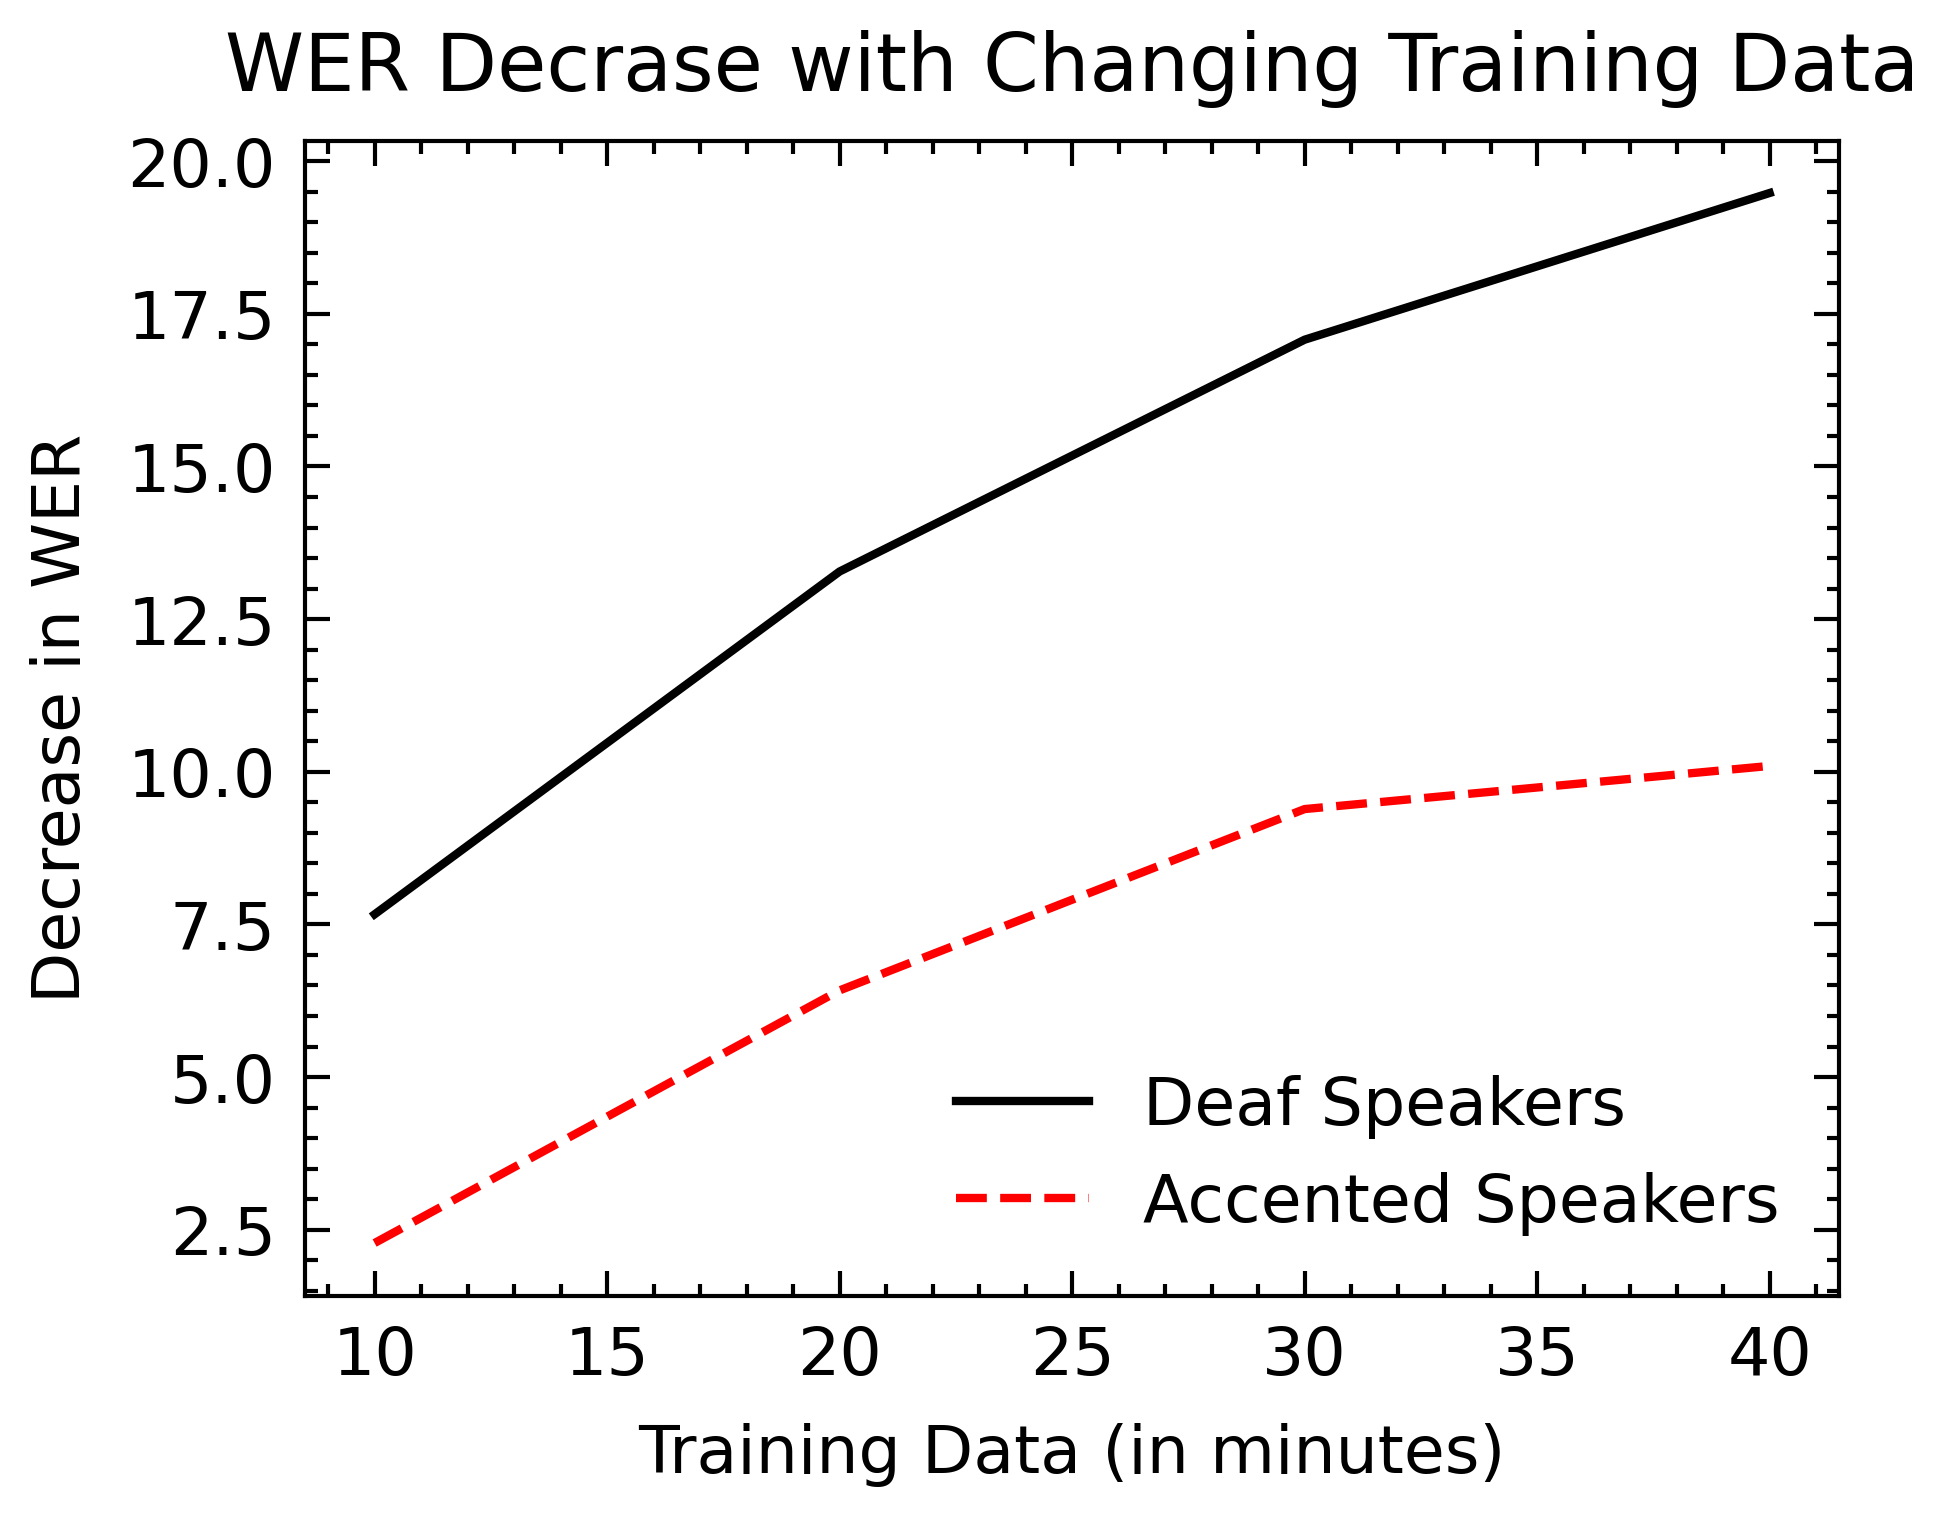

In [7]:
minutes = [10, 20, 30, 40]
deaf_wer_decrease = [7.66525, 13.28025, 17.07675, 19.4795]
accented_wer_decrease = [2.2816, 6.4196, 9.389, 10.0954]

plt.style.use(['science', 'ieee'])
plt.rcParams['text.usetex'] = False
plt.title('WER Decrase with Changing Training Data')
plt.plot(minutes, deaf_wer_decrease, label='Deaf Speakers')
plt.plot(minutes, accented_wer_decrease, label='Accented Speakers')
plt.xlabel('Training Data (in minutes)')
plt.ylabel('Decrease in WER')
plt.legend()

plt.show()

## Making plots using Plotly

In [18]:
import pandas as pd
deafs_df = pd.read_csv('./deaf_df.csv')
deafs_df

video_path            video_name  \
0     /ssd_scratch/cvit/vanshg/datasets/deaf-youtube...     15b1sEDtVCs_1_2_2   
1     /ssd_scratch/cvit/vanshg/datasets/deaf-youtube...     15b1sEDtVCs_1_3_3   
2     /ssd_scratch/cvit/vanshg/datasets/deaf-youtube...     15b1sEDtVCs_1_5_5   
3     /ssd_scratch/cvit/vanshg/datasets/deaf-youtube...     15b1sEDtVCs_1_8_8   
4     /ssd_scratch/cvit/vanshg/datasets/deaf-youtube...     15b1sEDtVCs_1_9_9   
...                                                 ...                   ...   
4961  /ssd_scratch/cvit/vanshg/datasets/deaf-youtube...   vX8lU9y_gOk_9_78_78   
4962  /ssd_scratch/cvit/vanshg/datasets/deaf-youtube...  vX8lU9y_gOk_11_79_79   
4963  /ssd_scratch/cvit/vanshg/datasets/deaf-youtube...  vX8lU9y_gOk_11_80_80   
4964  /ssd_scratch/cvit/vanshg/datasets/deaf-youtube...  vX8lU9y_gOk_11_81_81   
4965  /ssd_scratch/cvit/vanshg/datasets/deaf-youtube...  vX8lU9y_gOk_11_83_83   

         video_id    status  start    end  \
0     15b1sEDtVCs  Accepted   13.5   19.0   
1     15b1sEDtVCs  Accepted   19.2   25.8   
2     15b1sEDtVCs  Accepted   29.7   34.7   
3     15b1sEDtVCs  Accepted   45.9   47.8   
4     15b1sEDtVCs  Accepted   48.7   54.8   
...           ...       ...    ...    ...   
4961  vX8lU9y_gOk  Accepted  370.9  372.5   
4962  vX8lU9y_gOk  Accepted  382.2  383.4   
4963  vX8lU9y_gOk  Accepted  383.6  385.8   
4964  vX8lU9y_gOk  Accepted  385.6  387.9   
4965  vX8lU9y_gOk  Accepted  394.1  395.0   

                                             transcript  \
0     But, before when I first started learning ASL abc   
1     I realised I really struggled with how to reme...   
2     Until my boyfriend John asked me, do you know ...   
3                                   the funny thing is,   
4     finally, it clicked I've found ASL abc really ...   
...                                                 ...   
4961                          But I have favorites too!   
4962                                         That's it!   
4963                           I would write more, but.   
4964                       this video would be too long   
4965                                       I'm excited!   

                                         processed_text  num_words  \
0      BUT BEFORE WHEN I FIRST STARTED LEARNING ASL ABC          9   
1     I REALISED I REALLY STRUGGLED WITH HOW TO REME...         13   
2     UNTIL MY BOYFRIEND JOHN ASKED ME DO YOU KNOW A...         11   
3                                    THE FUNNY THING IS          4   
4     FINALLY IT CLICKED I'VE FOUND ASL ABC REALLY EASY          9   
...                                                 ...        ...   
4961                           BUT I HAVE FAVORITES TOO          5   
4962                                          THAT'S IT          2   
4963                             I WOULD WRITE MORE BUT          5   
4964                       THIS VIDEO WOULD BE TOO LONG          6   
4965                                        I'M EXCITED          2   

      num_seconds  
0             5.5  
1             6.6  
2             5.0  
3             1.9  
4             6.1  
...           ...  
4961          1.6  
4962          1.2  
4963          2.2  
4964          2.3  
4965          0.9  

[4966 rows x 10 columns]

In [19]:
accented_df = pd.read_csv('./accented_df.csv')
accented_df

video_path  \
0     /ssd_scratch/cvit/vanshg/datasets/accented_spe...   
1     /ssd_scratch/cvit/vanshg/datasets/accented_spe...   
2     /ssd_scratch/cvit/vanshg/datasets/accented_spe...   
3     /ssd_scratch/cvit/vanshg/datasets/accented_spe...   
4     /ssd_scratch/cvit/vanshg/datasets/accented_spe...   
...                                                 ...   
5156  /ssd_scratch/cvit/vanshg/datasets/accented_spe...   
5157  /ssd_scratch/cvit/vanshg/datasets/accented_spe...   
5158  /ssd_scratch/cvit/vanshg/datasets/accented_spe...   
5159  /ssd_scratch/cvit/vanshg/datasets/accented_spe...   
5160  /ssd_scratch/cvit/vanshg/datasets/accented_spe...   

                    video_name         video_id  status  start    end  \
0            23su4pTJ_XY_0_4_4      23su4pTJ_XY     NaN   21.5   35.9   
1            23su4pTJ_XY_2_5_6      23su4pTJ_XY     NaN   44.5   45.3   
2            23su4pTJ_XY_2_6_7      23su4pTJ_XY     NaN   45.7   49.8   
3            23su4pTJ_XY_2_7_8      23su4pTJ_XY     NaN   49.8   65.2   
4            23su4pTJ_XY_2_8_9      23su4pTJ_XY     NaN   65.4   69.0   
...                        ...              ...     ...    ...    ...   
5156  oUPRwfb37sM_004_19_68_69  oUPRwfb37sM_004     NaN  268.1  277.1   
5157  oUPRwfb37sM_004_21_69_70  oUPRwfb37sM_004     NaN  283.0  283.8   
5158  oUPRwfb37sM_004_22_71_72  oUPRwfb37sM_004     NaN  285.6  293.5   
5159  oUPRwfb37sM_004_23_72_73  oUPRwfb37sM_004     NaN  293.6  296.7   
5160  oUPRwfb37sM_004_23_73_74  oUPRwfb37sM_004     NaN  297.9  298.7   

                                             transcript  \
0      In regards to what it is, I've kind of been a...   
1                                      on this channel?   
2           I started them six years ago at this point.   
3     2016 was the first time I ever did anything wi...   
4      Remember that short film I did with Chase Bro...   
...                                                 ...   
5156  So if you want to see some stand-up self-depre...   
5157                                I'll be seeing you.   
5158  I promised nothing other than I'm trying to ma...   
5159               So yeah, that is why I quit YouTube.   
5160                                         Subscribe.   

                                         processed_text  num_words  \
0      IN REGARDS TO WHAT IT IS I'VE KIND OF BEEN AT...         63   
1                                       ON THIS CHANNEL          3   
2            I STARTED THEM SIX YEARS AGO AT THIS POINT          9   
3     2016 WAS THE FIRST TIME I EVER DID ANYTHING WI...         56   
4      REMEMBER THAT SHORT FILM I DID WITH CHASE BRO...         11   
...                                                 ...        ...   
5156  SO IF YOU WANT TO SEE SOME STANDUP SELFDEPRECA...         34   
5157                                 I'LL BE SEEING YOU          4   
5158  I PROMISED NOTHING OTHER THAN I'M TRYING TO MA...         30   
5159                 SO YEAH THAT IS WHY I QUIT YOUTUBE          8   
5160                                          SUBSCRIBE          1   

      num_seconds  
0            14.4  
1             0.8  
2             4.1  
3            15.4  
4             3.6  
...           ...  
5156          9.0  
5157          0.8  
5158          7.9  
5159          3.1  
5160          0.8  

[5161 rows x 10 columns]

In [21]:
import plotly.express as px
import pandas as pd

# Assuming 'deafs_df' is your DataFrame
sentence_durations = deafs_df['num_seconds'].to_numpy()
sentence_lengths = deafs_df['num_words'].to_numpy()

# print(f"Total Duration: {seconds_to_hhmmss(sentence_durations.sum())}")
print(f"Durations, Min: {sentence_durations.min()} | Max: {sentence_durations.max()} | Mean: {sentence_durations.mean()}")
print(f"Length, Min: {sentence_lengths.min()} | Max: {sentence_lengths.max()} | Mean: {sentence_lengths.mean()}")

# Plot sentence duration histogram using Plotly
fig1 = px.histogram(deafs_df, x=sentence_durations, nbins=25, title='Distribution of sentence durations (seconds) of deaf speakers')
fig1.update_layout(xaxis_title='Sentence Duration (seconds)', yaxis_title='Frequency')
fig1.show()

# Plot sentence length histogram using Plotly
fig2 = px.histogram(deafs_df, x=sentence_lengths, nbins=25, title='Distribution of sentence lengths (words) of deaf speakers')
fig2.update_layout(xaxis_title='Sentence Lengths (words)', yaxis_title='Frequency')
fig2.show()

Durations, Min: 0.3999999999999772 | Max: 19.100000000000023 | Mean: 3.555982480869915
Length, Min: 1 | Max: 55 | Mean: 7.849778493757551


In [22]:
import plotly.express as px
import pandas as pd
import numpy as np

# Combine the datasets into one DataFrame for Plotly
accented_df['speaker_type'] = 'Accented'
deafs_df['speaker_type'] = 'Deaf'

# Concatenate both DataFrames
combined_df = pd.concat([accented_df, deafs_df])

# Plot combined histogram for sentence durations
fig1 = px.histogram(combined_df, 
                    x='num_seconds', 
                    color='speaker_type', 
                    nbins=25, 
                    title='Distribution of Sentence Durations (seconds) of Accented and Deaf Speakers',
                    labels={'num_seconds': 'Sentence Duration (seconds)', 'speaker_type': 'Speaker Type'})
fig1.update_layout(xaxis_title='Sentence Duration (seconds)', yaxis_title='Frequency')
fig1.show()

# Plot combined histogram for sentence lengths
fig2 = px.histogram(combined_df, 
                    x='num_words', 
                    color='speaker_type', 
                    nbins=25, 
                    title='Distribution of Sentence Lengths (words) of Accented and Deaf Speakers',
                    labels={'num_words': 'Sentence Lengths (words)', 'speaker_type': 'Speaker Type'})
fig2.update_layout(xaxis_title='Sentence Lengths (words)', yaxis_title='Frequency')
fig2.show()


In [23]:
import plotly.express as px
import pandas as pd

# Assuming accented_df and deafs_df are your DataFrames
accented_df['speaker_type'] = 'Accented'
deafs_df['speaker_type'] = 'Deaf'

# Concatenate both DataFrames
combined_df = pd.concat([accented_df, deafs_df])

# Plot combined histogram for sentence durations
fig1 = px.histogram(combined_df, 
                    x='num_seconds', 
                    color='speaker_type', 
                    nbins=25, 
                    title='Distribution of Sentence Durations (seconds) of Accented and Deaf Speakers',
                    labels={'num_seconds': 'Sentence Duration (seconds)', 'speaker_type': 'Speaker Type'},
                    opacity=0.7)  # Adjust opacity here
fig1.update_layout(xaxis_title='Sentence Duration (seconds)', yaxis_title='Frequency')
fig1.show()

# Plot combined histogram for sentence lengths
fig2 = px.histogram(combined_df, 
                    x='num_words', 
                    color='speaker_type', 
                    nbins=25, 
                    title='Distribution of Sentence Lengths (words) of Accented and Deaf Speakers',
                    labels={'num_words': 'Sentence Length (words)', 'speaker_type': 'Speaker Type'},
                    opacity=0.7)  # Adjust opacity here
fig2.update_layout(xaxis_title='Sentence Length (words)', yaxis_title='Frequency')
fig2.show()


In [24]:
accented_df

video_path  \
0     /ssd_scratch/cvit/vanshg/datasets/accented_spe...   
1     /ssd_scratch/cvit/vanshg/datasets/accented_spe...   
2     /ssd_scratch/cvit/vanshg/datasets/accented_spe...   
3     /ssd_scratch/cvit/vanshg/datasets/accented_spe...   
4     /ssd_scratch/cvit/vanshg/datasets/accented_spe...   
...                                                 ...   
5156  /ssd_scratch/cvit/vanshg/datasets/accented_spe...   
5157  /ssd_scratch/cvit/vanshg/datasets/accented_spe...   
5158  /ssd_scratch/cvit/vanshg/datasets/accented_spe...   
5159  /ssd_scratch/cvit/vanshg/datasets/accented_spe...   
5160  /ssd_scratch/cvit/vanshg/datasets/accented_spe...   

                    video_name         video_id  status  start    end  \
0            23su4pTJ_XY_0_4_4      23su4pTJ_XY     NaN   21.5   35.9   
1            23su4pTJ_XY_2_5_6      23su4pTJ_XY     NaN   44.5   45.3   
2            23su4pTJ_XY_2_6_7      23su4pTJ_XY     NaN   45.7   49.8   
3            23su4pTJ_XY_2_7_8      23su4pTJ_XY     NaN   49.8   65.2   
4            23su4pTJ_XY_2_8_9      23su4pTJ_XY     NaN   65.4   69.0   
...                        ...              ...     ...    ...    ...   
5156  oUPRwfb37sM_004_19_68_69  oUPRwfb37sM_004     NaN  268.1  277.1   
5157  oUPRwfb37sM_004_21_69_70  oUPRwfb37sM_004     NaN  283.0  283.8   
5158  oUPRwfb37sM_004_22_71_72  oUPRwfb37sM_004     NaN  285.6  293.5   
5159  oUPRwfb37sM_004_23_72_73  oUPRwfb37sM_004     NaN  293.6  296.7   
5160  oUPRwfb37sM_004_23_73_74  oUPRwfb37sM_004     NaN  297.9  298.7   

                                             transcript  \
0      In regards to what it is, I've kind of been a...   
1                                      on this channel?   
2           I started them six years ago at this point.   
3     2016 was the first time I ever did anything wi...   
4      Remember that short film I did with Chase Bro...   
...                                                 ...   
5156  So if you want to see some stand-up self-depre...   
5157                                I'll be seeing you.   
5158  I promised nothing other than I'm trying to ma...   
5159               So yeah, that is why I quit YouTube.   
5160                                         Subscribe.   

                                         processed_text  num_words  \
0      IN REGARDS TO WHAT IT IS I'VE KIND OF BEEN AT...         63   
1                                       ON THIS CHANNEL          3   
2            I STARTED THEM SIX YEARS AGO AT THIS POINT          9   
3     2016 WAS THE FIRST TIME I EVER DID ANYTHING WI...         56   
4      REMEMBER THAT SHORT FILM I DID WITH CHASE BRO...         11   
...                                                 ...        ...   
5156  SO IF YOU WANT TO SEE SOME STANDUP SELFDEPRECA...         34   
5157                                 I'LL BE SEEING YOU          4   
5158  I PROMISED NOTHING OTHER THAN I'M TRYING TO MA...         30   
5159                 SO YEAH THAT IS WHY I QUIT YOUTUBE          8   
5160                                          SUBSCRIBE          1   

      num_seconds speaker_type  
0            14.4     Accented  
1             0.8     Accented  
2             4.1     Accented  
3            15.4     Accented  
4             3.6     Accented  
...           ...          ...  
5156          9.0     Accented  
5157          0.8     Accented  
5158          7.9     Accented  
5159          3.1     Accented  
5160          0.8     Accented  

[5161 rows x 11 columns]

In [25]:
deaf_num_seconds = deafs_df['num_seconds']
deaf_num_seconds.to_csv('./deaf_num_seconds.csv')

accented_num_seconds = accented_df['num_seconds']
accented_num_seconds.to_csv('./accented_num_seconds.csv')

In [26]:
import plotly.express as px
import pandas as pd

# Assuming accented_df and deafs_df are your DataFrames
accented_df['speaker_type'] = 'Accented'
deafs_df['speaker_type'] = 'Deaf'

# Concatenate both DataFrames
combined_df = pd.concat([accented_df, deafs_df])

# Filter out values
filtered_combined_df = combined_df[(combined_df['num_seconds'] <= 17) & (combined_df['num_words'] <= 50)]

# Plot combined histogram for sentence durations
fig1 = px.histogram(filtered_combined_df, 
                    x='num_seconds', 
                    color='speaker_type', 
                    nbins=25, 
                    title='Distribution of Sentence Durations (seconds) of Accented and Deaf Speakers',
                    labels={'num_seconds': 'Sentence Duration (seconds)', 'speaker_type': 'Speaker Type'},
                    opacity=0.7)  # Adjust opacity here
fig1.update_layout(
    xaxis_title='Sentence Duration (seconds)', 
    yaxis_title='Frequency',
    width=600,  # Adjust width
    height=400  # Adjust height
)
fig1.show()

# Plot combined histogram for sentence lengths
# fig2 = px.histogram(filtered_combined_df, 
#                     x='num_words', 
#                     color='speaker_type', 
#                     nbins=25, 
#                     title='Distribution of Sentence Lengths (words) of Accented and Deaf Speakers',
#                     labels={'num_words': 'Sentence Length (words)', 'speaker_type': 'Speaker Type'},
#                     opacity=0.7)  # Adjust opacity here
# fig2.update_layout(
#     xaxis_title='Sentence Length (words)', 
#     yaxis_title='Frequency',
#     width=600,  # Adjust width
#     height=400  # Adjust height
# )
# fig2.show()


In [27]:
import plotly.express as px
import pandas as pd

# Assuming accented_df and deafs_df are your DataFrames
accented_df['speaker_type'] = 'Accented'
deafs_df['speaker_type'] = 'Deaf'

# Concatenate both DataFrames
combined_df = pd.concat([accented_df, deafs_df])

# Filter out values
filtered_combined_df = combined_df[(combined_df['num_seconds'] <= 17) & (combined_df['num_words'] <= 50)]

# Plot combined histogram for sentence durations
fig1 = px.histogram(filtered_combined_df, 
                    x='num_seconds', 
                    color='speaker_type', 
                    nbins=25, 
                    title='Distribution of Sentence Durations (seconds) of Accented and Deaf Speakers',
                    labels={'num_seconds': 'Sentence Duration (seconds)', 'speaker_type': 'Speaker Type'},
                    opacity=0.7)  # Adjust opacity here
fig1.update_layout(
    xaxis_title='Sentence Duration (seconds)', 
    yaxis_title='Frequency',
    width=600,  # Adjust width
    height=400  # Adjust height
)
fig1.update_yaxes(title_text='Frequency')  # Ensure y-axis title is set correctly
fig1.show()

# Plot combined histogram for sentence lengths
fig2 = px.histogram(filtered_combined_df, 
                    x='num_words', 
                    color='speaker_type', 
                    nbins=25, 
                    title='Distribution of Sentence Lengths (words) of Accented and Deaf Speakers',
                    labels={'num_words': 'Sentence Length (words)', 'speaker_type': 'Speaker Type'},
                    opacity=0.7)  # Adjust opacity here
fig2.update_layout(
    xaxis_title='Sentence Length (words)', 
    yaxis_title='Frequency',
    width=600,  # Adjust width
    height=400  # Adjust height
)
fig2.update_yaxes(title_text='Frequency')  # Ensure y-axis title is set correctly
fig2.show()


In [28]:
import plotly.graph_objects as go

# Create a histogram for the first dataset
data1 = deafs_df['num_seconds'].to_numpy()
data2 = accented_df['num_seconds'].to_numpy()

hist1 = np.histogram(data1, bins=25)
hist2 = np.histogram(data2, bins=25)

# Create figure
fig = go.Figure()

# Add first histogram trace
fig.add_trace(go.Bar(
    x=hist1[1][:-1],  # Bin edges for the first histogram
    y=hist1[0],       # Bin counts for the first histogram
    name='Data 1',
    marker_color='blue',
    opacity=0.7
))

# Add second histogram trace
fig.add_trace(go.Bar(
    x=hist2[1][:-1],  # Bin edges for the second histogram
    y=hist2[0],       # Bin counts for the second histogram
    name='Data 2',
    marker_color='red',
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of Two Datasets',
    xaxis_title='Value',
    yaxis_title='Frequency',
    barmode='overlay',  # Overlay histograms
    width=600,          # Adjust width
    height=400          # Adjust height
)

# Show plot
fig.show()

In [29]:
import plotly.graph_objects as go
import plotly.io as pio

# Set the template to a white background for better visibility
pio.templates.default = "plotly_white"

# Assuming you have two dataframes: deafs_df and accented_df
deaf_durations = deafs_df['num_seconds']
accented_durations = accented_df['num_seconds']

# Create the figure
fig = go.Figure()

# Add histogram for deaf speakers
fig.add_trace(go.Histogram(
    x=deaf_durations,
    name='Deaf Speakers',
    opacity=0.75,
    marker_color='blue',
    nbinsx=30
))

# Add histogram for accented speakers
fig.add_trace(go.Histogram(
    x=accented_durations,
    name='Accented Speakers',
    opacity=0.75,
    marker_color='red',
    nbinsx=30
))

# Update layout
fig.update_layout(
    title_text='Distribution of Sentence Durations: Deaf vs Accented Speakers',
    xaxis_title_text='Sentence Duration (seconds)',
    yaxis_title_text='Frequency',
    bargap=0.2,
    bargroupgap=0.1
)

# Add custom legend title
fig.update_layout(
    legend_title_text='Speaker Type'
)

# Overlay both histograms
fig.update_layout(barmode='overlay')

# Add annotations for statistics
deaf_stats = f"Deaf - Min: {deaf_durations.min():.2f}s, Max: {deaf_durations.max():.2f}s, Mean: {deaf_durations.mean():.2f}s"
accented_stats = f"Accented - Min: {accented_durations.min():.2f}s, Max: {accented_durations.max():.2f}s, Mean: {accented_durations.mean():.2f}s"

# fig.add_annotation(text='Deaf', xref="paper", yref="paper", x=0.5, y=1.05, showarrow=False)
# fig.add_annotation(text='Accen', xref="paper", yref="paper", x=0.5, y=1.02, showarrow=False)

# Show the plot
fig.show()

In [30]:
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np

# Set the template to a white background for better visibility
pio.templates.default = "plotly_white"

# Assuming you have two dataframes: deafs_df and accented_df
# Filter out durations above 17 seconds
deaf_durations = deafs_df[deafs_df['num_seconds'] <= 17]['num_seconds']
accented_durations = accented_df[accented_df['num_seconds'] <= 17]['num_seconds']

# Create the figure
fig = go.Figure()

# Function to create histogram traces
def create_histogram(data, name, color):
    return go.Histogram(
        x=data,
        name=name,
        opacity=0.7,
        marker_color=color,
        nbinsx=34,  # Increased number of bins for more detail
        histnorm='percent',  # Normalize to percentage for better comparison
    )

# Add histogram for deaf speakers
fig.add_trace(create_histogram(deaf_durations, 'Deaf Speakers', 'rgba(70, 130, 180, 0.8)'))  # Soft blue

# Add histogram for accented speakers
fig.add_trace(create_histogram(accented_durations, 'Accented Speakers', 'rgba(255, 99, 71, 0.8)'))  # Soft red

# Update layout
fig.update_layout(
    title={
        'text': 'Distribution of Sentence Durations: Deaf vs Accented Speakers',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=24)
    },
    xaxis_title_text='Sentence Duration (seconds)',
    yaxis_title_text='Percentage',
    bargap=0.2,
    bargroupgap=0.1,
    legend=dict(
        title_text='Speaker Type',
        bgcolor='rgba(255,255,255,0.5)',
        bordercolor='rgba(0,0,0,0.1)',
        borderwidth=1
    ),
    plot_bgcolor='rgba(240,240,240,0.95)',  # Light gray background
    width=900,
    height=600
)

# Overlay both histograms
fig.update_layout(barmode='overlay')

# Update x-axis to focus on the range up to 17 seconds
fig.update_xaxes(range=[0, 17], dtick=1)

# Add a vertical line at the mean for each distribution
# fig.add_vline(x=deaf_durations.mean(), line_dash="dash", line_color="rgba(70, 130, 180, 1)")
# fig.add_vline(x=accented_durations.mean(), line_dash="dash", line_color="rgba(255, 99, 71, 1)")

# Add annotations for statistics
def add_stats_annotation(data, name, y_position, color):
    stats_text = (f"{name}<br>"
                  f"Mean: {data.mean():.2f}s | Median: {data.median():.2f}s<br>"
                  f"Min: {data.min():.2f}s | Max: {data.max():.2f}s")
    fig.add_annotation(text=stats_text, xref="paper", yref="paper", x=1.02, y=y_position, 
                       showarrow=False, align="left", bgcolor=color, bordercolor="black", borderwidth=1)

# add_stats_annotation(deaf_durations, "Deaf Speakers", 1, "rgba(70, 130, 180, 0.1)")
# add_stats_annotation(accented_durations, "Accented Speakers", 0.85, "rgba(255, 99, 71, 0.1)")

# Show the plot
fig.show()

In [31]:
import plotly.graph_objects as go
import plotly.io as pio

# Set the template to a white background
pio.templates.default = "plotly_white"

# Assuming you have two dataframes: deafs_df and accented_df
# Filter out durations above 17 seconds
deaf_durations = deafs_df[deafs_df['num_seconds'] <= 17]['num_seconds']
accented_durations = accented_df[accented_df['num_seconds'] <= 17]['num_seconds']

# Create the figure
fig = go.Figure()

# Function to create histogram traces
def create_histogram(data, name, color):
    return go.Histogram(
        x=data,
        name=name,
        opacity=0.75,
        marker_color=color,
        nbinsx=34,
    )

# Add histogram for deaf speakers
fig.add_trace(create_histogram(deaf_durations, 'Deaf Speakers', '#1f77b4'))  # Darker blue

# Add histogram for accented speakers
fig.add_trace(create_histogram(accented_durations, 'Accented Speakers', '#d62728'))  # Darker red

# Update layout
fig.update_layout(
    title={
        'text': 'Distribution of Sentence Durations: Deaf vs Accented Speakers',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=16)
    },
    xaxis_title_text='Sentence Duration (seconds)',
    yaxis_title_text='Frequency',
    bargap=0.2,
    bargroupgap=0.1,
    legend=dict(
        title_text='Speaker Type',
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99,
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='rgba(0,0,0,0.1)',
        borderwidth=1
    ),
    width=600,  # Reduced width for paper
    height=400,  # Reduced height for paper
    margin=dict(l=50, r=50, t=60, b=50)  # Adjusted margins
)

# Overlay both histograms
fig.update_layout(barmode='overlay')

# Update x-axis to focus on the range up to 17 seconds
fig.update_xaxes(range=[0, 17], dtick=2)

# Update y-axis to use integers for frequency
fig.update_yaxes(dtick=50)

# Add a vertical line at the mean for each distribution
# fig.add_vline(x=deaf_durations.mean(), line_dash="dash", line_color="#1f77b4", line_width=1.5)
# fig.add_vline(x=accented_durations.mean(), line_dash="dash", line_color="#d62728", line_width=1.5)

# Add annotations for statistics
# Use a static image format suitable for papers
# fig.write_image("sentence_duration_histogram.png", scale=2)  # Increased DPI for better quality

# If you want to display the plot in your development environment
fig.show()

In [32]:
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np

# Set the template to a white background
pio.templates.default = "plotly_white"

# Assuming you have two dataframes: deafs_df and accented_df
# Filter out durations above 17 seconds
deaf_durations = deafs_df[deafs_df['num_seconds'] <= 17]['num_seconds']
accented_durations = accented_df[accented_df['num_seconds'] <= 17]['num_seconds']

# Create bins for histograms
bins = np.linspace(0, 17, 35)  # 34 bins from 0 to 17

# Create the figure
fig = go.Figure()

# Add histogram for deaf speakers
fig.add_trace(go.Bar(
    x=bins[:-1],
    y=np.histogram(deaf_durations, bins=bins)[0],
    name='Deaf Speakers',
    marker_color='#1f77b4',  # Blue
    opacity=0.75
))

# Add histogram for accented speakers
fig.add_trace(go.Bar(
    x=bins[:-1],
    y=np.histogram(accented_durations, bins=bins)[0],
    name='Accented Speakers',
    marker_color='#d62728',  # Red
    opacity=0.75,
    marker_line_width=0,
))

# Update layout
fig.update_layout(
    title={
        'text': 'Distribution of Sentence Durations: Deaf vs Accented Speakers',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=16)
    },
    xaxis_title_text='Sentence Duration (seconds)',
    yaxis_title_text='Frequency',
    barmode='group',
    bargap=0.3,
    bargroupgap=0.0,
    legend=dict(
        title_text='Speaker Type',
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99,
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='rgba(0,0,0,0.1)',
        borderwidth=1
    ),
    width=600,  # Width for paper
    height=400,  # Height for paper
    margin=dict(l=50, r=50, t=60, b=50)  # Adjusted margins
)

# Update x-axis to focus on the range up to 17 seconds
fig.update_xaxes(range=[0, 17], dtick=1, tickvals=np.arange(0, 18, 1))

# Update y-axis to use integers for frequency
fig.update_yaxes(dtick=100)

# Use a static image format suitable for papers
# fig.write_image("sentence_duration_histogram.png", scale=2)  # Increased DPI for better quality

# If you want to display the plot in your development environment
fig.show()

In [33]:
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np

# Set the template to a white background
pio.templates.default = "plotly_white"

# Assuming you have two dataframes: deafs_df and accented_df
# Filter out durations above 17 seconds
deaf_durations = deafs_df[deafs_df['num_seconds'] <= 17]['num_seconds']
accented_durations = accented_df[accented_df['num_seconds'] <= 17]['num_seconds']

# Create bins for histograms
bins = np.linspace(0, 17, 35)  # 34 bins from 0 to 17
bin_width = bins[1] - bins[0]

# Calculate histogram data
deaf_hist, _ = np.histogram(deaf_durations, bins=bins)
accented_hist, _ = np.histogram(accented_durations, bins=bins)

# Create the figure
fig = go.Figure()

# Add histogram for deaf speakers
fig.add_trace(go.Bar(
    x=bins[:-1],
    y=deaf_hist,
    name='Deaf Speakers',
    marker_color='#1f77b4',  # Blue
    width=bin_width/2  # Half the bin width
))

# Add histogram for accented speakers
fig.add_trace(go.Bar(
    x=bins[:-1] + bin_width/2,  # Shift by half bin width
    y=accented_hist,
    name='Accented Speakers',
    marker_color='#d62728',  # Red
    width=bin_width/2  # Half the bin width
))

# Update layout
fig.update_layout(
    title={
        'text': 'Distribution of Sentence Durations: Deaf vs Accented Speakers',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=16)
    },
    xaxis_title_text='Sentence Duration (seconds)',
    yaxis_title_text='Frequency',
    barmode='group',
    bargap=1.0,  # Increased gap between groups
    bargroupgap=0,  # No gap within groups
    legend=dict(
        title_text='Speaker Type',
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99,
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='rgba(0,0,0,0.1)',
        borderwidth=1
    ),
    width=600,  # Width for paper
    height=400,  # Height for paper
    margin=dict(l=50, r=50, t=60, b=50)  # Adjusted margins
)

# Update x-axis to focus on the range up to 17 seconds
fig.update_xaxes(range=[0, 17], dtick=1, tickvals=np.arange(0, 18, 2))

# Update y-axis to use integers for frequency
fig.update_yaxes(dtick=50)

# Use a static image format suitable for papers
# fig.write_image("sentence_duration_histogram.png", scale=2)  # Increased DPI for better quality

# If you want to display the plot in your development environment
fig.show()

In [34]:
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np

# Set the template to a white background
pio.templates.default = "plotly_white"

# Assuming you have two dataframes: deafs_df and accented_df
# Filter out durations above 17 seconds
deaf_durations = deafs_df[deafs_df['num_seconds'] <= 17]['num_seconds']
accented_durations = accented_df[accented_df['num_seconds'] <= 17]['num_seconds']

# Create bins for histograms
bins = np.linspace(0, 17, 18)  # 17 bins from 0 to 17, each representing 1 second

# Calculate histogram data
deaf_hist, _ = np.histogram(deaf_durations, bins=bins)
accented_hist, _ = np.histogram(accented_durations, bins=bins)

# Create the figure
fig = go.Figure()

# Add histogram for deaf speakers
fig.add_trace(go.Bar(
    x=bins[:-1],
    y=deaf_hist,
    name='Deaf Speakers',
    marker_color='#1f77b4',  # Blue
))

# Add histogram for accented speakers
fig.add_trace(go.Bar(
    x=bins[:-1],
    y=accented_hist,
    name='Accented Speakers',
    marker_color='#d62728',  # Red
))

# Update layout
fig.update_layout(
    title={
        'text': 'Distribution of Sentence Durations: Deaf vs Accented Speakers',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=16)
    },
    xaxis_title_text='Sentence Duration (seconds)',
    yaxis_title_text='Frequency',
    barmode='group',
    bargap=0.2,        # Gap between different duration groups
    bargroupgap=0.0,   # No gap within groups (bars stick together)
    legend=dict(
        title_text='Speaker Type',
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99,
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='rgba(0,0,0,0.1)',
        borderwidth=1
    ),
    width=600,  # Width for paper
    height=400,  # Height for paper
    margin=dict(l=50, r=50, t=60, b=50)  # Adjusted margins
)

# Update x-axis to focus on the range up to 17 seconds
fig.update_xaxes(range=[-0.5, 17], dtick=1, tickvals=np.arange(0, 18, 1))

# Update y-axis to use integers for frequency
fig.update_yaxes(dtick=50)

# Use a static image format suitable for papers
# fig.write_image("sentence_duration_histogram.png", scale=2)  # Increased DPI for better quality

# If you want to display the plot in your development environment
fig.show()

In [35]:
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np

# Set the template to a white background
pio.templates.default = "plotly_white"

# Assuming you have two dataframes: deafs_df and accented_df
# Filter out durations above 17 seconds
deaf_durations = deafs_df[deafs_df['num_seconds'] <= 17]['num_seconds']
accented_durations = accented_df[accented_df['num_seconds'] <= 17]['num_seconds']

# Create bins for histograms
bins = np.linspace(0, 17, 18)  # 17 bins from 0 to 17, each representing 1 second

# Calculate histogram data
deaf_hist, _ = np.histogram(deaf_durations, bins=bins)
accented_hist, _ = np.histogram(accented_durations, bins=bins)

# Create the figure
fig = go.Figure()

# Add histogram for deaf speakers
fig.add_trace(go.Bar(
    x=bins[:-1],
    y=deaf_hist,
    name='Deaf Speakers',
    marker_color='#3366cc',  # Rich blue
    marker_line_width=0,     # Remove border for a cleaner look
))

# Add histogram for accented speakers
fig.add_trace(go.Bar(
    x=bins[:-1],
    y=accented_hist,
    name='Accented Speakers',
    marker_color='#dc3912',  # Deep red
    marker_line_width=0,     # Remove border for a cleaner look
))

# Update layout
fig.update_layout(
    title={
        # 'text': 'Distribution of Sentence Durations: Deaf vs Accented Speakers',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=32)
    },
    xaxis_title_text='Sentence Duration (seconds)',
    yaxis_title_text='Frequency',
    barmode='group',
    bargap=0.15,       # Reduced gap between different duration groups for thicker bars
    bargroupgap=0.02,  # Slight gap within groups for better distinction
    legend=dict(
        title_text='Speaker Type',
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99,
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='rgba(0,0,0,0.1)',
        borderwidth=1
    ),
    width=600,  # Width for paper
    height=400,  # Height for paper
    margin=dict(l=50, r=50, t=60, b=50),  # Adjusted margins
    plot_bgcolor='rgba(255,255,255,1.0)',  # Light gray background for better contrast
    xaxis=dict(
        title_font=dict(size=24),  # Font size for x-axis title
        tickfont=dict(size=18),    # Font size for x-axis ticks
    ),
    yaxis=dict(
        title_font=dict(size=24),  # Font size for y-axis title
        tickfont=dict(size=18),    # Font size for y-axis ticks
    )
)

# Update x-axis to focus on the range up to 17 seconds
fig.update_xaxes(range=[-0.5, 17], dtick=1, tickvals=np.arange(0, 18, 1))

# Update y-axis to use integers for frequency
# fig.update_yaxes(dtick=100)

# Use a static image format suitable for papers
# fig.write_image("sentence_duration_histogram.png", scale=2)  # Increased DPI for better quality

# If you want to display the plot in your development environment
fig.show()

In [39]:
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np

# Set the template to a white background
pio.templates.default = "plotly_white"

# Assuming you have two dataframes: deafs_df and accented_df
# Filter out durations above 17 seconds
deaf_durations = deafs_df[deafs_df['num_seconds'] <= 17]['num_seconds']
accented_durations = accented_df[accented_df['num_seconds'] <= 17]['num_seconds']

# Create bins for histograms
bins = np.linspace(0, 17, 18)  # 17 bins from 0 to 17, each representing 1 second

# Calculate histogram data
deaf_hist, _ = np.histogram(deaf_durations, bins=bins)
accented_hist, _ = np.histogram(accented_durations, bins=bins)

# Create the figure
fig = go.Figure()

# Add histogram for deaf speakers
fig.add_trace(go.Bar(
    x=bins[:-1],
    y=deaf_hist,
    name='Deaf Speakers',
    marker_color='#4c72b0',  # Dark moderate blue
    marker_line_width=0,
    opacity=0.8
))

# Add histogram for accented speakers
fig.add_trace(go.Bar(
    x=bins[:-1],
    y=accented_hist,
    name='Accented Speakers',
    marker_color='#dd8452',  # Dark moderate orange
    marker_line_width=0,
    opacity=0.8
))

# Update layout
fig.update_layout(
    # title={
    #     # 'text': 'Distribution of Sentence Durations: Deaf vs Accented Speakers',
    #     'y':0.95,
    #     'x':0.5,
    #     'xanchor': 'center',
    #     'yanchor': 'top',
    #     'font': dict(size=16)
    # },
    xaxis_title_text='Sentence Duration (seconds)',
    yaxis_title_text='Frequency',
    barmode='group',
    bargap=0.15,
    bargroupgap=0.02,
    legend=dict(
        # title_text='Speaker Type',
        title_font=dict(size=24),  # Font size for legend title
        font=dict(size=18),        # Font size for legend items
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99,
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='rgba(0,0,0,0.1)',
        borderwidth=1
    ),
    width=600,
    height=400,
    margin=dict(l=50, r=50, t=60, b=50),
    plot_bgcolor='rgba(255,255,255,1.0)',
    font=dict(family="Arial", size=12, color="#000000"),
    xaxis=dict(
        title_font=dict(size=24),  # Font size for x-axis title
        tickfont=dict(size=18),    # Font size for x-axis ticks
    ),
    yaxis=dict(
        title_font=dict(size=24),  # Font size for y-axis title
        tickfont=dict(size=18),    # Font size for y-axis ticks
    )
    
)

# Update x-axis to focus on the range up to 17 seconds
fig.update_xaxes(range=[-0.5, 17], dtick=1, tickvals=np.arange(0, 18, 1))

# Update y-axis to use integers for frequency
fig.update_yaxes(dtick=200)

# Use a static image format suitable for papers
# fig.write_image("sentence_duration_histogram.png", scale=2)  # Increased DPI for better quality

# If you want to display the plot in your development environment
fig.show()

In [41]:
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np

# Set the template to a white background
pio.templates.default = "plotly_white"

# Assuming you have two dataframes: deafs_df and accented_df
# Filter out durations above 17 seconds
deaf_durations = deafs_df[deafs_df['num_words'] <= 50]['num_words']
accented_durations = accented_df[accented_df['num_words'] <= 50]['num_words']

# Create bins for histograms
bins = np.linspace(0, 50, 25)  # 17 bins from 0 to 17, each representing 1 second

# Calculate histogram data
deaf_hist, _ = np.histogram(deaf_durations, bins=bins)
accented_hist, _ = np.histogram(accented_durations, bins=bins)

# Create the figure
fig = go.Figure()

# Add histogram for deaf speakers
fig.add_trace(go.Bar(
    x=bins[:-1],
    y=deaf_hist,
    name='Deaf Speakers',
    marker_color='#C96868',  # Dark moderate blue
    marker_line_width=0,
    opacity=0.8
))

# Add histogram for accented speakers
fig.add_trace(go.Bar(
    x=bins[:-1],
    y=accented_hist,
    name='Accented Speakers',
    marker_color='#7EACB5',  # Dark moderate orange
    marker_line_width=0,
    opacity=0.8
))

# Update layout
fig.update_layout(
    # title={
    #     'text': 'Distribution of Sentence Lengths: Deaf vs Accented Speakers',
    #     'y':0.95,
    #     'x':0.5,
    #     'xanchor': 'center',
    #     'yanchor': 'top',
    #     'font': dict(size=16)
    # },
    xaxis_title_text='Sentence Lengths (words)',
    yaxis_title_text='Frequency',
    barmode='group',
    bargap=0.25,
    bargroupgap=0.02,
    legend=dict(
        # title_text='Speaker Type',
        title_font=dict(size=24),  # Font size for legend title
        font=dict(size=18),        # Font size for legend items
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99,
        bgcolor='rgba(255,255,255,1.0)',
        bordercolor='rgba(0,0,0,0.1)',
        borderwidth=1
    ),
    width=600,
    height=400,
    margin=dict(l=50, r=50, t=60, b=50),
    plot_bgcolor='rgba(255,255,255,1.0)',
    font=dict(family="Arial", size=12, color="#000000"),
    xaxis=dict(
        title_font=dict(size=24),  # Font size for x-axis title
        tickfont=dict(size=18),    # Font size for x-axis ticks
    ),
    yaxis=dict(
        title_font=dict(size=24),  # Font size for y-axis title
        tickfont=dict(size=18),    # Font size for y-axis ticks
    )
)

# Update x-axis to focus on the range up to 17 seconds
fig.update_xaxes(range=[1, 50], tickvals=np.arange(1, 50, 2))

# Update y-axis to use integers for frequency
fig.update_yaxes(dtick=100)

# Use a static image format suitable for papers
# fig.write_image("sentence_duration_histogram.png", scale=2)  # Increased DPI for better quality

# If you want to display the plot in your development environment
fig.show()

## Making Final Word Clouds

In [104]:
deaf_sentences = list(deafs_df['processed_text'])
accented_sentences = list(accented_df['processed_text'])

In [94]:
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/vanshg/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/vanshg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

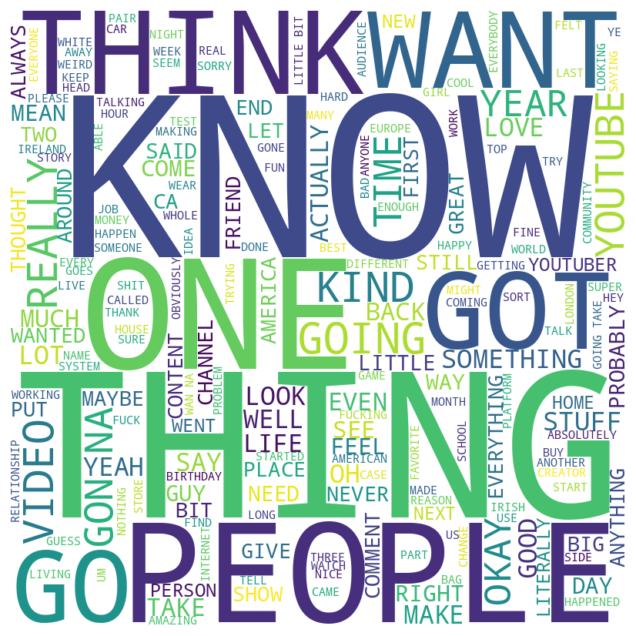

In [107]:
# Tokenize the text and remove stop words
text = ' '.join(accented_sentences)
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(text)
filtered_tokens = [word for word in tokens if word.isalnum() and word.lower() not in stop_words]

# Join tokens back into a single string
filtered_text = ' '.join(filtered_tokens)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(filtered_text)

# Plot the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

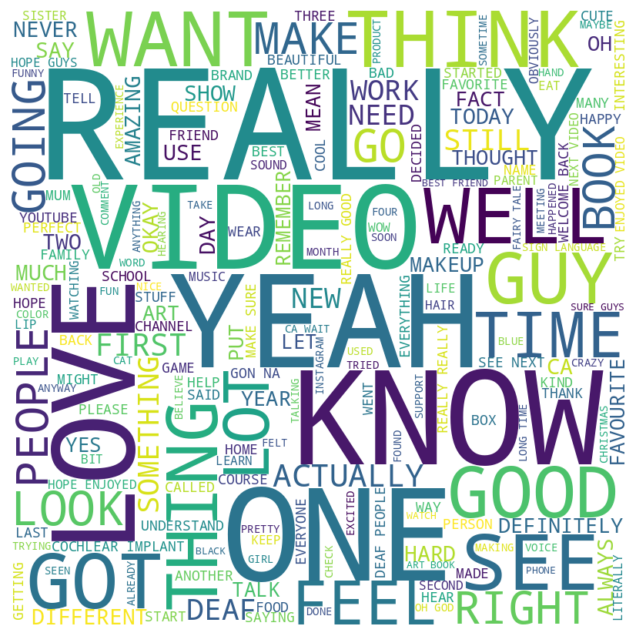

In [103]:
# Tokenize the text and remove stop words
text = ' '.join(deaf_sentences)
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(text)
filtered_tokens = [word for word in tokens if word.isalnum() and word.lower() not in stop_words]

# Join tokens back into a single string
filtered_text = ' '.join(filtered_tokens)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(filtered_text)

# Plot the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

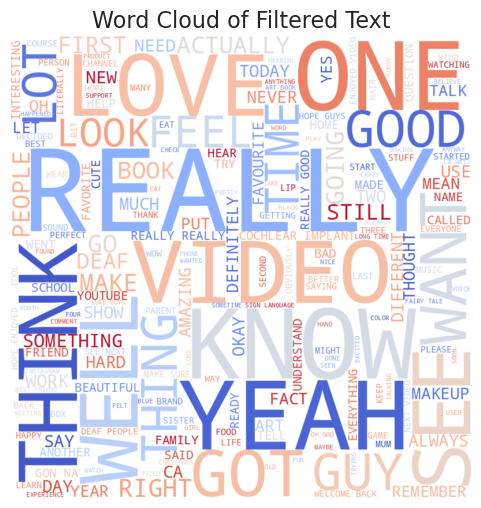

In [100]:
# Tokenize the text and remove stop words
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(text)
filtered_tokens = [word for word in tokens if word.isalnum() and word.lower() not in stop_words]

# Join tokens back into a single string
filtered_text = ' '.join(filtered_tokens)

# Generate the word cloud with a squarish aspect ratio and improved aesthetics
wordcloud = WordCloud(
    width=800,
    height=800,  # Make the plot more squarish
    background_color='white',
    colormap='coolwarm',  # Use a colormap for better visual appeal
    contour_color='black',
    contour_width=1,
    min_font_size=10,
    max_font_size=200,
    margin=2
).generate(filtered_text)

# Plot the word cloud
plt.figure(figsize=())  # Adjust the figure size to be more square
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Filtered Text', fontsize=16)  # Add a title with a larger font size
plt.show()
